In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

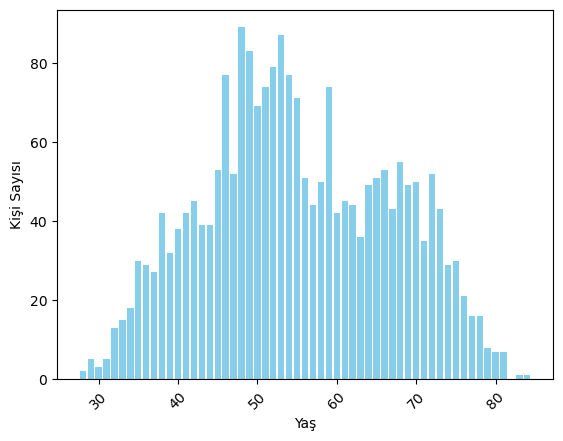

In [6]:
df['Age'] = 2024 - df['Year_Birth'] # Here we add the age column.

min_age = 25
max_age = 85
# I limited the age to 85 to make the graph look better.
filtered_age_counts = df[df['Age'].between(min_age, max_age)]['Age'].value_counts().sort_index()

plt.bar(filtered_age_counts.index, filtered_age_counts.values, color='skyblue')
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)
plt.show()

In [7]:
df['Age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

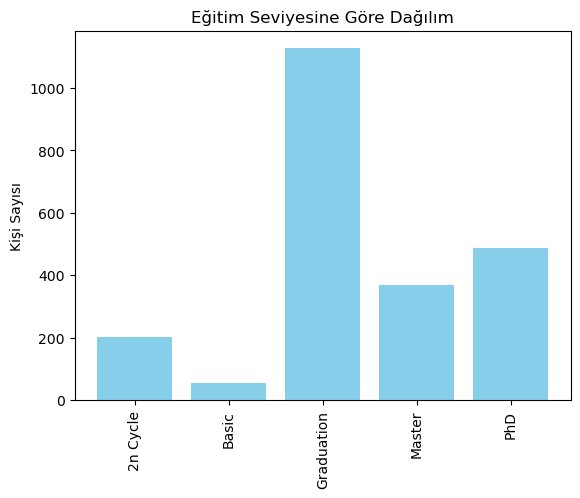

In [10]:
education = df['Education'].value_counts().sort_index()

plt.bar(education.index, education.values, color='skyblue')
plt.ylabel('Kişi Sayısı')
plt.title('Eğitim Seviyesine Göre Dağılım')
plt.xticks(education.index, rotation=90)

plt.show()

In [11]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [12]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

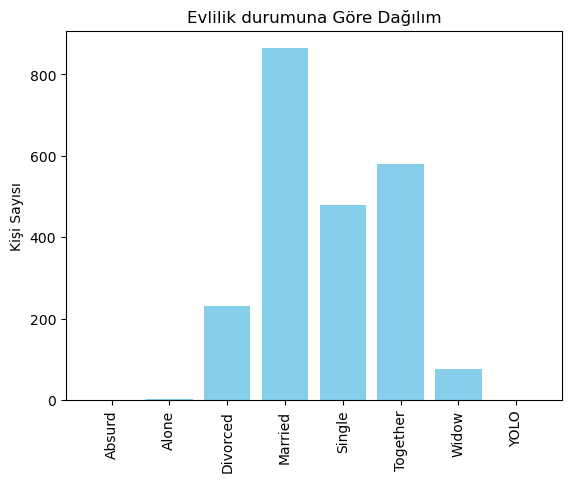

In [13]:
Marital_Status = df['Marital_Status'].value_counts().sort_index()

plt.bar(Marital_Status.index, Marital_Status.values, color='skyblue')
plt.ylabel('Kişi Sayısı')
plt.title('Evlilik durumuna Göre Dağılım')
plt.xticks(Marital_Status.index, rotation=90)

plt.show()

In [14]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

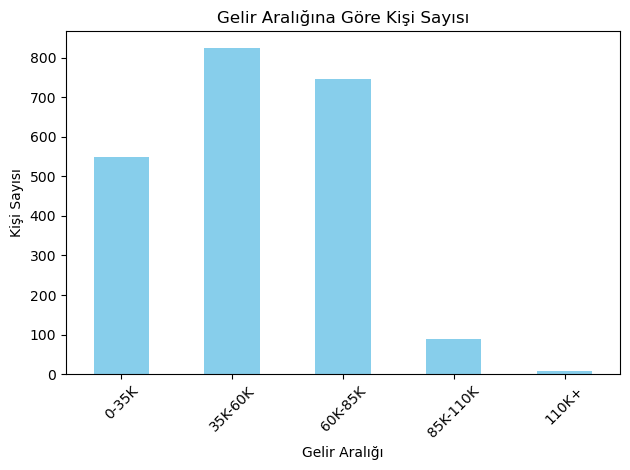

In [15]:
gelir_aralıkları = [0, 35000, 60000, 85000, 110000, 700000]
gelir_etiketleri = ['0-35K', '35K-60K', '60K-85K', '85K-110K', '110K+']

gelir_grupları = pd.cut(df['Income'], bins=gelir_aralıkları, labels=gelir_etiketleri, right=False)

gelir_grupları.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Gelir Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Gelir Aralığına Göre Kişi Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
today = pd.to_datetime('today')
df['Membership_Days'] = (today - df['Dt_Customer']).dt.days
df.drop('Dt_Customer', axis=1, inplace=True)

# Here we calculate how many days the customer has been a member of our market.

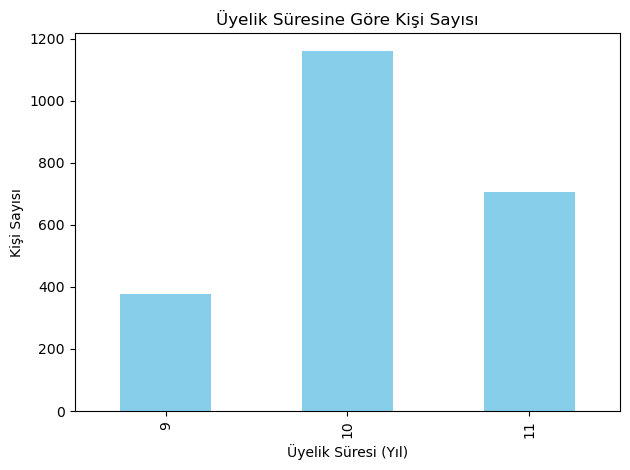

In [17]:
membership_years = df['Membership_Days'] // 365

membership_years.value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.xlabel('Üyelik Süresi (Yıl)')
plt.ylabel('Kişi Sayısı')
plt.title('Üyelik Süresine Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

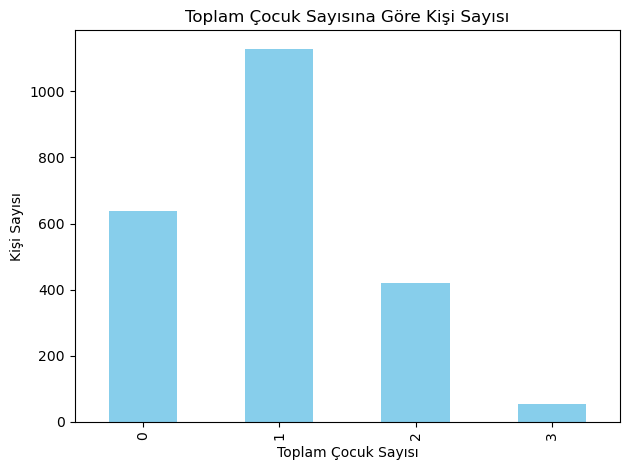

In [18]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
# Since there is no clear difference between a young child and a teen, I have combined the two.
child_groups = df['Total_Children'].value_counts().sort_index()

child_groups.plot(kind='bar', color='skyblue')

plt.xlabel('Toplam Çocuk Sayısı')
plt.ylabel('Kişi Sayısı')
plt.title('Toplam Çocuk Sayısına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

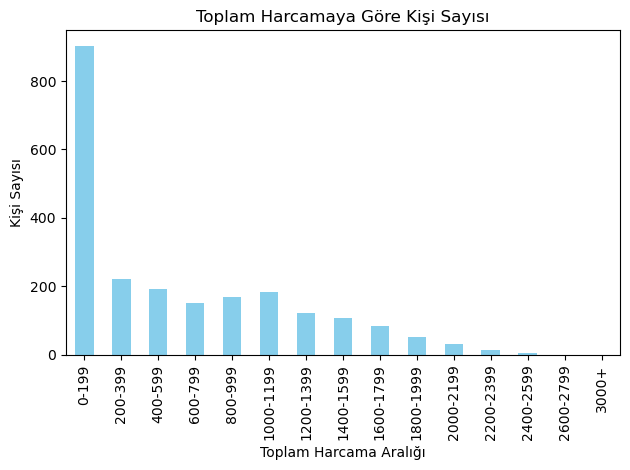

In [19]:
import numpy as np

df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
# I added up the expenditures and combined them so that I could use them in graphics and models.
bins = np.append(np.arange(0, 3000, 200), np.inf)
labels = [f'{i}-{i+199}' for i in range(0, 2800, 200)] + ['3000+']
spending_groups = pd.cut(df['Total_Spending'], bins=bins, labels=labels)

spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.xlabel('Toplam Harcama Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Toplam Harcamaya Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

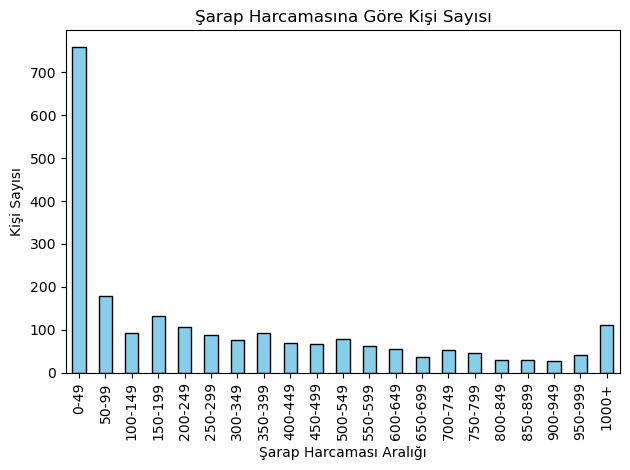

In [20]:
df['Total_Wine_Spending'] = df['MntWines']
bins = np.append(np.arange(0, 1050, 50), np.inf)
labels = [f'{i}-{i+49}' for i in range(0, 1000, 50)] + ['1000+']
wine_spending_groups = pd.cut(df['Total_Wine_Spending'], bins=bins, labels=labels)

wine_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Şarap Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Şarap Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

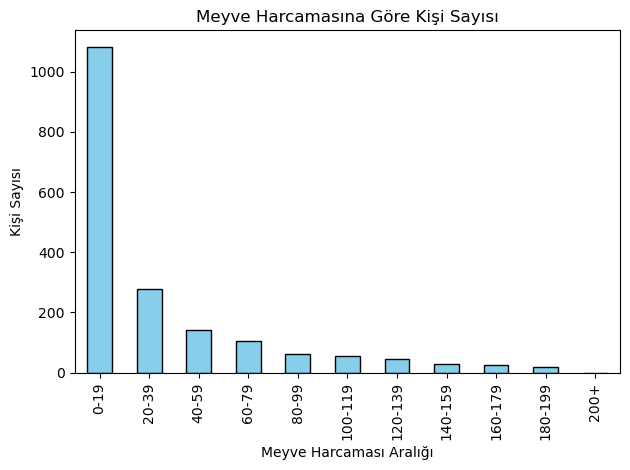

In [21]:
df['Total_Fruit_Spending'] = df['MntFruits']

bins = np.append(np.arange(0, 220, 20), np.inf)
labels = [f'{i}-{i+19}' for i in range(0, 200, 20)] + ['200+']
fruit_spending_groups = pd.cut(df['Total_Fruit_Spending'], bins=bins, labels=labels)

fruit_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Meyve Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Meyve Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

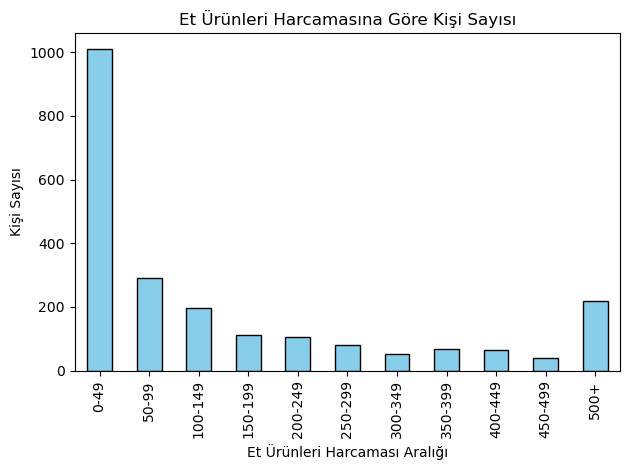

In [22]:
df['Total_Meat_Products_Spending'] = df['MntMeatProducts']

bins = np.append(np.arange(0, 550, 50), np.inf)
labels = [f'{i}-{i+49}' for i in range(0, 500, 50)] + ['500+']
meat_products_spending_groups = pd.cut(df['Total_Meat_Products_Spending'], bins=bins, labels=labels)

meat_products_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Et Ürünleri Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Et Ürünleri Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

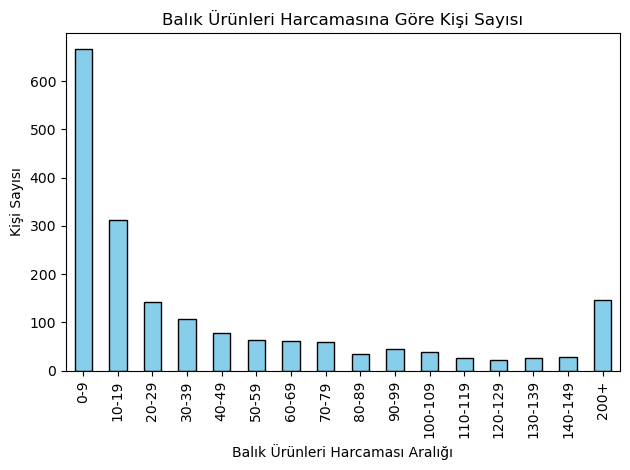

In [23]:
df['Total_Fish_Products_Spending'] = df['MntFishProducts']

bins = np.append(np.arange(0, 160, 10), np.inf)
labels = [f'{i}-{i+9}' for i in range(0, 150, 10)] + ['200+']
fish_products_spending_groups = pd.cut(df['Total_Fish_Products_Spending'], bins=bins, labels=labels)

fish_products_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Balık Ürünleri Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Balık Ürünleri Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

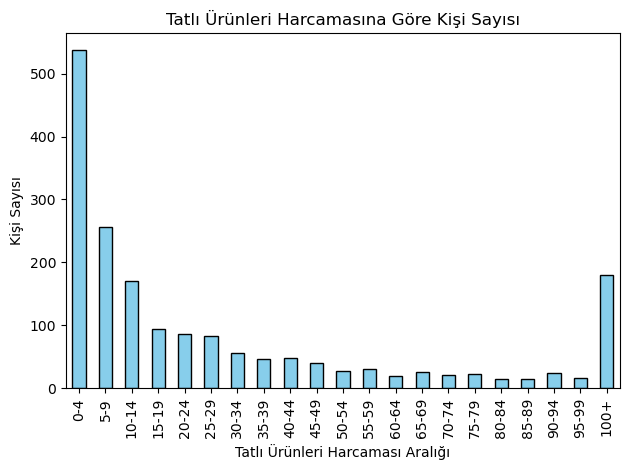

In [24]:
df['Total_Sweet_Products_Spending'] = df['MntSweetProducts']

bins = np.append(np.arange(0, 105, 5), np.inf)
labels = [f'{i}-{i+4}' for i in range(0, 100, 5)] + ['100+']
sweet_products_spending_groups = pd.cut(df['Total_Sweet_Products_Spending'], bins=bins, labels=labels)

sweet_products_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Tatlı Ürünleri Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Tatlı Ürünleri Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

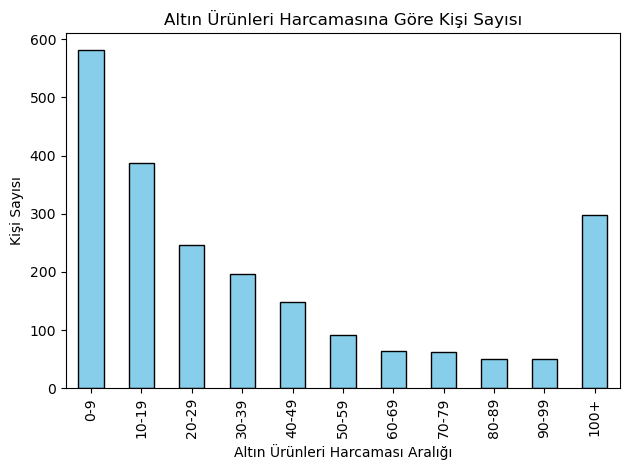

In [25]:
df['Total_Gold_Products_Spending'] = df['MntGoldProds']

bins = np.append(np.arange(0, 110, 10), np.inf)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)] + ['100+']
gold_products_spending_groups = pd.cut(df['Total_Gold_Products_Spending'], bins=bins, labels=labels)

gold_products_spending_groups.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Altın Ürünleri Harcaması Aralığı')
plt.ylabel('Kişi Sayısı')
plt.title('Altın Ürünleri Harcamasına Göre Kişi Sayısı')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

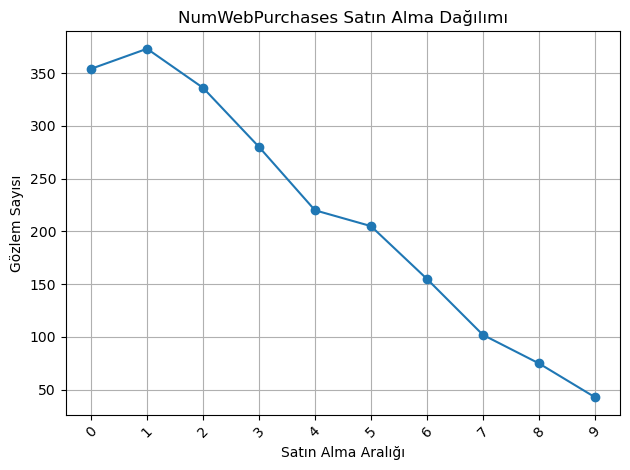

0    354
1    373
2    336
3    280
4    220
5    205
6    155
7    102
8     75
9     43
Name: NumWebPurchases, dtype: int64


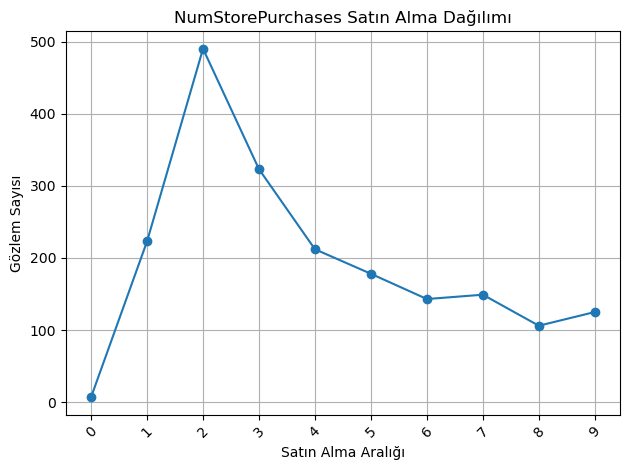

0      7
1    223
2    490
3    323
4    212
5    178
6    143
7    149
8    106
9    125
Name: NumStorePurchases, dtype: int64


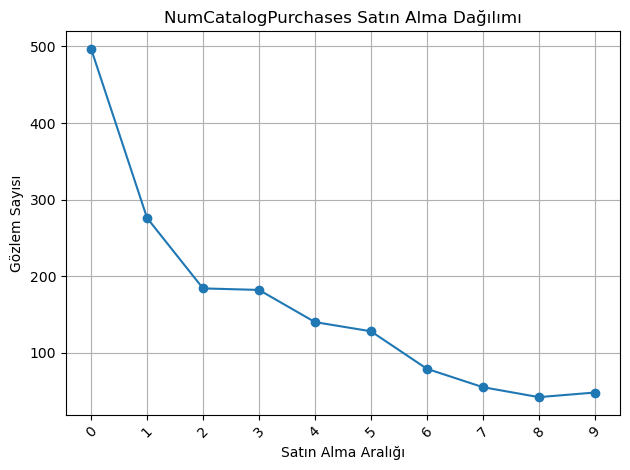

0    497
1    276
2    184
3    182
4    140
5    128
6     79
7     55
8     42
9     48
Name: NumCatalogPurchases, dtype: int64


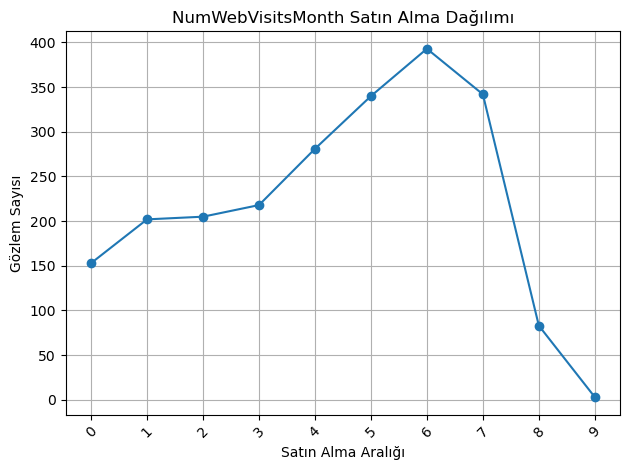

0    153
1    202
2    205
3    218
4    281
5    340
6    393
7    342
8     83
9      3
Name: NumWebVisitsMonth, dtype: int64


In [26]:
bins = np.arange(0, 11, 1)
labels = [f'{i}' for i in range(0, 10, 1)]
data = df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']]
for column in data:
    data_grouped = pd.cut(df[column], bins=bins, labels=[str(label) for label in labels]).value_counts().reindex(labels).fillna(0)
    plt.figure()
    plt.plot(data_grouped.index, data_grouped.values, marker='o')
    plt.xlabel('Satın Alma Aralığı')
    plt.ylabel('Gözlem Sayısı')
    plt.title(f'{column} Satın Alma Dağılımı')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print(data_grouped)

In [27]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Membership_Days,Total_Children,Total_Spending,Total_Wine_Spending,Total_Fruit_Spending,Total_Meat_Products_Spending,Total_Fish_Products_Spending,Total_Sweet_Products_Spending,Total_Gold_Products_Spending
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,55.194196,3884.582143,0.950446,605.798214,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,11.984069,202.122512,0.751803,602.249288,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.000000,3531.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,47.000000,3711.750000,0.000000,68.750000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,54.000000,3886.500000,1.000000,396.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,65.000000,4060.000000,1.000000,1045.500000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,131.000000,4230.000000,3.000000,2525.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [28]:
df.isnull().sum()

ID                                0
Year_Birth                        0
Education                         0
Marital_Status                    0
Income                           24
Kidhome                           0
Teenhome                          0
Recency                           0
MntWines                          0
MntFruits                         0
MntMeatProducts                   0
MntFishProducts                   0
MntSweetProducts                  0
MntGoldProds                      0
NumDealsPurchases                 0
NumWebPurchases                   0
NumCatalogPurchases               0
NumStorePurchases                 0
NumWebVisitsMonth                 0
AcceptedCmp3                      0
AcceptedCmp4                      0
AcceptedCmp5                      0
AcceptedCmp1                      0
AcceptedCmp2                      0
Complain                          0
Z_CostContact                     0
Z_Revenue                         0
Response                    

In [29]:
ortalama = df['Income'].mean()
df['Income'].fillna(ortalama, inplace=True)
# I filled the null values with mean to avoid data loss.

In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Age,Membership_Days,Total_Children,Total_Spending,Total_Wine_Spending,Total_Fruit_Spending,Total_Meat_Products_Spending,Total_Fish_Products_Spending,Total_Sweet_Products_Spending,Total_Gold_Products_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,67,4194,0,1617,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,70,3644,2,27,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,59,3843,0,776,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,40,3670,1,53,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,43,3692,1,422,173,43,118,46,27,15


In [31]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Other')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow'], 'Single')
# Here I tried to unify marital status a bit more because there were too many unnecessary categories.

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Age,Membership_Days,Total_Children,Total_Spending,Total_Wine_Spending,Total_Fruit_Spending,Total_Meat_Products_Spending,Total_Fish_Products_Spending,Total_Sweet_Products_Spending,Total_Gold_Products_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,67,4194,0,1617,635,88,546,172,88,88
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,70,3644,2,27,11,1,6,2,1,6
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,59,3843,0,776,426,49,127,111,21,42
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,40,3670,1,53,11,4,20,10,3,5
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,43,3692,1,422,173,43,118,46,27,15


In [33]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [34]:
education_mapping = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}

df['Education'] = df['Education'].map(education_mapping)
# Here I have converted the education column into numerical data.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Income'] = scaler.fit_transform(df['Income'].values.reshape(-1, 1))
# 

In [36]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Income'] < lower_limit) | (df['Income'] > upper_limit)]

df = df[((df['Income'] > lower_limit) | (df['Income'] < upper_limit))]

outliers
# Here, I removed the outlier values in terms of revenue from my dataset because I realized that if I did not do so, 
# it would affect the clustering too much.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Age,Membership_Days,Total_Children,Total_Spending,Total_Wine_Spending,Total_Fruit_Spending,Total_Meat_Products_Spending,Total_Fish_Products_Spending,Total_Sweet_Products_Spending,Total_Gold_Products_Spending
164,8475,1973,5,Married,4.194426,0,1,98,20,2,...,51,3651,1,1608,20,2,1582,1,2,1
617,1503,1976,5,Together,4.400321,1,1,31,85,1,...,48,3922,2,107,85,1,16,2,1,2
655,5555,1975,3,Single,4.061837,0,0,81,1,1,...,49,3673,0,6,1,1,1,1,1,1
687,1501,1982,5,Married,4.336643,0,0,21,55,16,...,42,4225,0,1717,55,16,1622,17,3,4
1300,5336,1971,4,Together,4.214001,1,0,37,39,1,...,53,3921,1,59,39,1,9,2,0,8
1653,4931,1977,3,Together,4.190551,0,0,13,1,0,...,47,3957,0,1730,1,0,1725,2,1,1
2132,11181,1949,5,Married,4.181683,0,0,85,2,1,...,75,3835,0,8,2,1,2,1,1,1
2233,9432,1977,3,Together,24.545128,1,0,23,9,14,...,47,3923,1,62,9,14,18,8,1,12


In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Membership_Days', 'Total_Children', 'Total_Spending',
       'Total_Wine_Spending', 'Total_Fruit_Spending',
       'Total_Meat_Products_Spending', 'Total_Fish_Products_Spending',
       'Total_Sweet_Products_Spending', 'Total_Gold_Products_Spending'],
      dtype='object')

In [38]:
print(df['Z_CostContact'].value_counts())
print(df['Z_Revenue'].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [39]:
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)
# I removed these two columns because they contained exactly the same numerical data.
df.drop('ID', axis=1, inplace=True)
# I removed the ID column because it is irrelevant

In [40]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)
print(df.head())

   Year_Birth  Education Marital_Status    Income  Recency  MntWines  \
0        1957          3         Single  0.235327       58       635   
1        1954          3         Single -0.235826       38        11   
2        1965          3       Together  0.773633       26       426   
3        1984          3       Together -1.022732       26        11   
4        1981          5        Married  0.241519       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Age  \
0         88              546              172                88  ...   67   
1          1                6                2                 1  ...   70   
2         49              127              111                21  ...   59   
3          4               20               10                 3  ...   40   
4         43              118               46                27  ...   43   

   Membership_Days  Total_Children  Total_Spending  Total_Wine_Spending  \
0             4194     

In [41]:
df['Spending']= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df = df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
df = df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

df.drop('Wines', axis=1, inplace=True)
df.drop('Fruits', axis=1, inplace=True)
df.drop('Meat', axis=1, inplace=True)
df.drop('Fish', axis=1, inplace=True)
df.drop('Sweets', axis=1, inplace=True)
df.drop('Gold', axis=1, inplace=True)

df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,...,Membership_Days,Total_Children,Total_Spending,Total_Wine_Spending,Total_Fruit_Spending,Total_Meat_Products_Spending,Total_Fish_Products_Spending,Total_Sweet_Products_Spending,Total_Gold_Products_Spending,Spending
0,1957,3,Single,0.235327,58,3,8,10,4,7,...,4194,0,1617,635,88,546,172,88,88,1617
1,1954,3,Single,-0.235826,38,2,1,1,2,5,...,3644,2,27,11,1,6,2,1,6,27
2,1965,3,Together,0.773633,26,1,8,2,10,4,...,3843,0,776,426,49,127,111,21,42,776
3,1984,3,Together,-1.022732,26,2,2,0,4,6,...,3670,1,53,11,4,20,10,3,5,53
4,1981,5,Married,0.241519,94,5,5,3,6,5,...,3692,1,422,173,43,118,46,27,15,422


In [42]:
def remove_outliers(data, features):
    cleaned_data = data.copy()
    for feature in features:
        Q1 = np.percentile(cleaned_data[feature], 25)
        Q3 = np.percentile(cleaned_data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        cleaned_data = cleaned_data[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]
    
    return cleaned_data

In [43]:
df = remove_outliers(df, ['Total_Spending', 'Income', 'Membership_Days'])

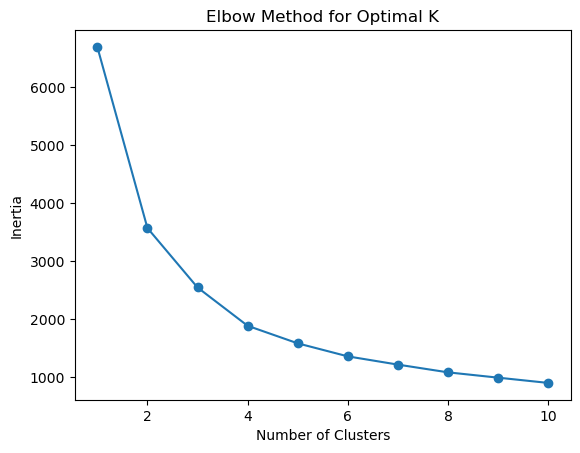

[6687.000000000004, 3569.134731073087, 2545.633512395172, 1886.0466052341574, 1583.8925044266607, 1359.5571238918074, 1217.669911805398, 1084.491940212339, 993.0778671759651, 902.5136486124402]


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["Total_Spending", "Income", "Membership_Days"]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
print(inertia)

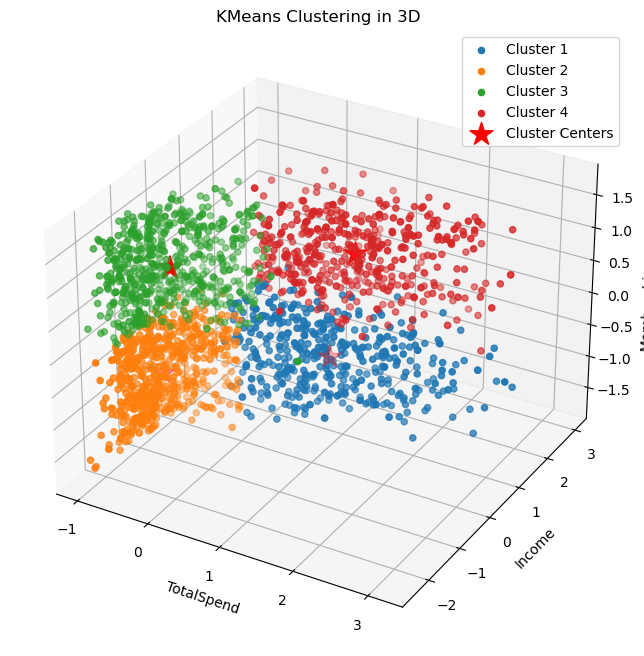

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# The reason for the choice of 4 here is because of the break in the graph and it was chosen thanks to the elbow method.
kmeans.fit(X_scaled)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(X_scaled[cluster_labels == i][:, 0], 
               X_scaled[cluster_labels == i][:, 1], 
               X_scaled[cluster_labels == i][:, 2], 
               label='Cluster ' + str(i + 1))
    
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='red', marker='*', label='Cluster Centers')

ax.set_xlabel('TotalSpend')
ax.set_ylabel('Income')
ax.set_zlabel('Membership_Days')

plt.title('KMeans Clustering in 3D')
plt.legend()
plt.show()

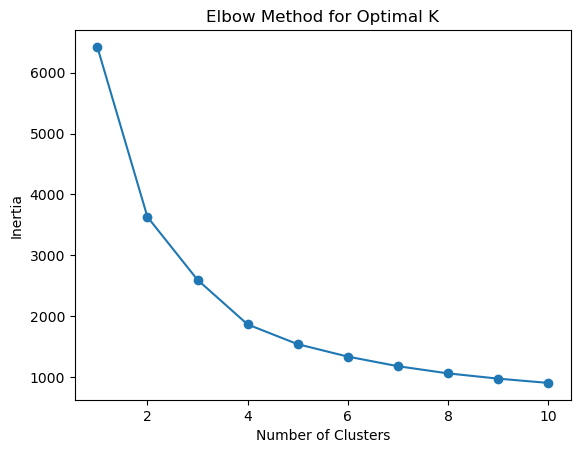

[6423.0, 3631.5216449806203, 2598.3449068093364, 1865.9775478748875, 1541.5768147212268, 1337.7995497102181, 1179.9873830880872, 1062.190231764158, 976.0979347010255, 905.5987892606022]


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ["Total_Wine_Spending", "Income", "Education"]
df = remove_outliers(df, ['Total_Wine_Spending', 'Income', 'Education'])

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()
print(inertia)

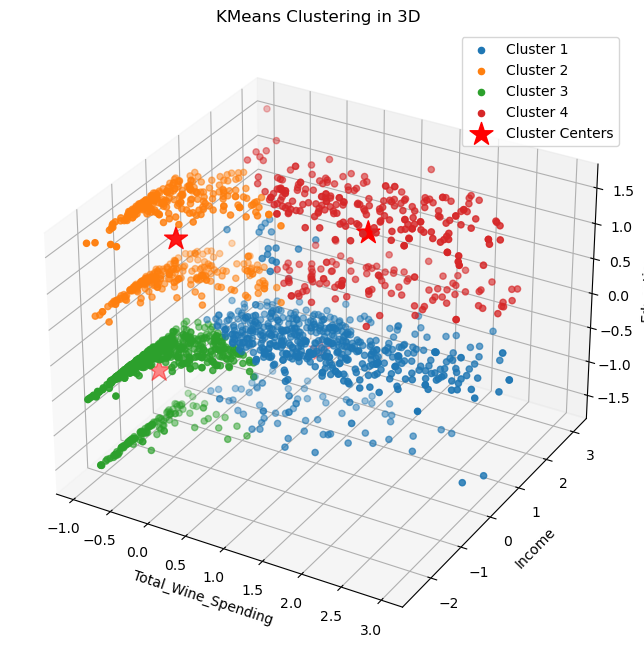

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# The reason for choosing 4 here is the same as in the previous graph.
kmeans.fit(X_scaled)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(X_scaled[cluster_labels == i][:, 0], 
               X_scaled[cluster_labels == i][:, 1], 
               X_scaled[cluster_labels == i][:, 2], 
               label='Cluster ' + str(i + 1))
    
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='red', marker='*', label='Cluster Centers')

ax.set_xlabel('Total_Wine_Spending')
ax.set_ylabel('Income')
ax.set_zlabel('Education')

plt.title('KMeans Clustering in 3D')
plt.legend()
plt.show()